## Sophia Arackal

# Project Titanic Dataset

* This project involve using the titanic-train.csv and titanic-test.csv datasets. It requires completing an exploratory data analysis, Principal Component Analysis (PCA), Support Vector Machine (SVM) and SVM Hyperparameter Tuning using GridSearchCV on both datasets.



In [1]:
# Load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import norm
sns.set(context = 'paper', palette = 'Dark2', style = 'darkgrid', rc= {'figure.facecolor': 'gray',}, font_scale=1.5)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import warnings
import nbconvert
warnings.filterwarnings('ignore')

## Feature Descriptions and Identifying which features are Categorical and Continuous Variables:

* Survived: Wheather the person Survived or not. Survival (0 = no; 1 = yes) - Categorical

* Pclass: Passanger class indicates the class of that person aboard the ship.(1 = first; 2 = second; 3 = third) - Categorical

* Sex: Sex - Categorical

* Age: Age - Continous/Numerical

* SibSp: Number of siblings/spouses aboard - Continous/Numerical

* Parch: Number of parents/children aboard - Continous/Numerical

* Ticket: Ticket name/Number.

* Fare: Passenger fare - Continous/Numerical

* Cabin: Cabin name of that Passenger 

* Embarked: Point of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)- Categorical



# Load Train and Test Data Sets

In [2]:
# load data sets 

train = pd.read_csv('titanic-train.csv') 
test = pd.read_csv('titanic-test.csv')                     


In [3]:
# Name of Columns

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# I will use the Passenger ID to combine with predictions to create submission csv file at the end of this notebook.  

pid = test['PassengerId']

# Exploratory Data Analysis (EDA)  and Data Clean up- Training Data Set

* I will conduct an EDA and data clean up training data set. I will replace NA values and remove features that don't have an impact on survival rates. 

In [5]:
# View the dataframe

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# View the statistical analysis of dataframe

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# View the shape of the dataframe

print(train.shape)

(891, 12)


In [8]:
# View the first few rows of dataframe

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# The overall chance of survival for a Titanic passenger. 
# Conclusion: It shows that only ~38% of the passengers survived.

train['Survived'].mean()

0.3838383838383838

In [10]:
# To view the composition of each class, I group the data by class and view the averages for each column. 
# Conclusion: The results show that the passengers in first class had a ~63% chance of survival, whereas the passengers in third class had a ~24% chance of survival. 

train.groupby('Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
# Using the grouping function for both class and sex to view survival rates by class and gender. 
# Conclusion: The results show across all classes that women were much more likely to survive than the men. 

class_sex_grouping = train.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

<AxesSubplot:xlabel='Age'>

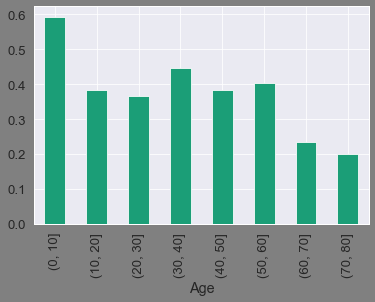

In [12]:
# To see the survival rate by age in a plot. 
# Conclusion: It shows that children under the age of 10 were most likely the age group to survive.

group_by_age = pd.cut(train["Age"], np.arange(0, 90, 10))
age_grouping = train.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [13]:
# To get the count of missing values of the entire dataframe. I have determined that Age, Cabin, and Embark have missing values. 

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Fixing Missing Values in Train Data Set 

In [14]:
# Count values of each column. There are 3 columns (Age, Cabin, Embarked) where they don't match the count of 891 due to NaN or missing values. I will need to investigate further. 

train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [15]:
# Replace missing values in Age with median value

print('Number of missing Age values:', train['Age'].isnull().sum())
Age_med = train.Age.median()
train['Age'] = train['Age'].fillna(Age_med)
train['Age'].unique()


Number of missing Age values: 177


array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
# Replace two missing values in Embarked with S = Southampton 

print('Number of missing Embarked values ',train['Embarked'].isnull().sum())
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].unique()

Number of missing Embarked values  2


array(['S', 'C', 'Q'], dtype=object)

## Remove Features that don't have impact on survival

In [17]:
# I decided to drop these features becuase they don't have impact on the survival rates.

train = train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)


In [18]:
# Check Count after removal of columns and fixing missing values. Now all the counts are the same. 

train.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

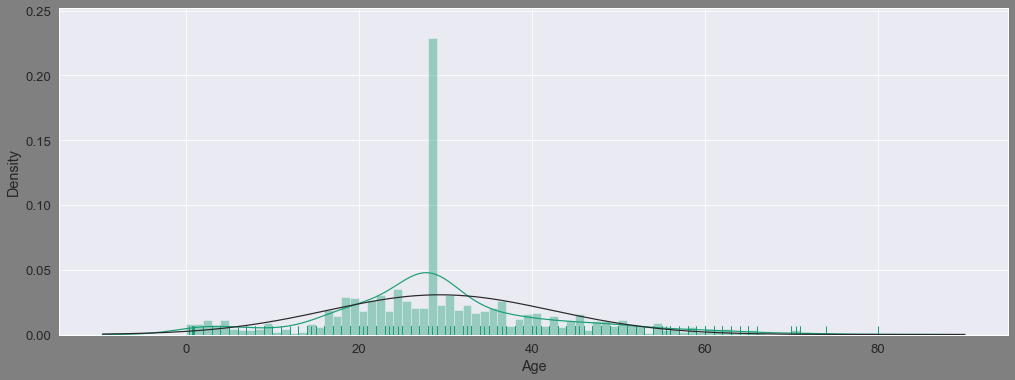

In [19]:
# This graph shows me the age range of the passengers aboard the Titanic. The highest bar is due to changing the missing ages with median.
# Conclusion: It agrees with my previous analysis above with an age range of infant to 80 year old person. 

plt.figure(figsize = [17,6])
age_graph = sns.distplot(train['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

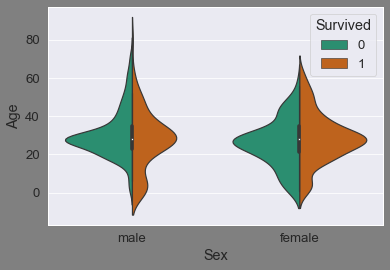

In [20]:
# Violinplot Displays distribution of data based on age and sex  
# Conclusion: It agrees with my previous analysis above in which there are more females that have survived. 

sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = train, split = True) 

# Exploratory Data Analysis (EDA)  and Data Clean up- Test Data Set

* I will conduct an EDA and data clean up test data set. I will replace NA values and remove features that don't have an impact on survival rates. 

In [21]:
# Name of Columns

test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
# View the dataframe

test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [23]:
# View the statistical analysis of dataframe

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
# View the shape of dataframe

print(test.shape)

(418, 11)


In [25]:
# View the first few rows of dataframe

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
#to get the count of missing values of the entire dataframe. I have determined that Age, Cabin, and Fare have missing values. 

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Fixing Missing Values in Test Data Set

In [27]:
# Count values of each column. There are 3 columns (Age, Fare, Cabin) where they don't match the count of 418 due to NaN or missing values. I will need to investigate further. 

test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [28]:
# Replace missing values in Age with median value

print('Number of missing Age values:', test['Age'].isnull().sum())
Age_med = test.Age.median()
test['Age'] = test['Age'].fillna(Age_med)
test['Age'].unique()

Number of missing Age values: 86


array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  , 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,  9.  ,
       48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  , 60.  ,
       36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  , 29.  ,
       28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  , 16.  ,
        1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,  7.  ,
       15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33, 38.  ,
       57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,  0.17,
       59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [29]:
# Replace missing value in Fare with median value

print('Number of missing Fare values:', test['Fare'].isnull().sum())
Fare_med = test.Fare.median()
test['Fare'] = test['Fare'].fillna(Age_med)
test['Fare'].unique()



Number of missing Fare values: 1


array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

## Remove Features that don't have impact on survival

In [30]:
# I decided to drop these features becuase they don't have impact on the survival rates.

test = test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)


In [31]:
# Check Count after removal of columns and fixing missing values. Now all the counts are the same.

test.count()

Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Fare        418
Embarked    418
dtype: int64


# Data Normalization and Standardization - Training Data Set

* After replacing missing values and removing features, I am ready to normalize and standardize the data set to prepare data set for PCA.

In [32]:
# Identifying the categorical and numerical variables and shape of data. 

train_data_num = train[['Age','Fare','SibSp','Parch']]
train_data_cat = train[['Sex','Embarked', 'Pclass']]
y1 = train[['Survived']]

print("Numerical Feature Shape:     "+ str(train_data_num.shape))
print("Categorical Feature Shape:   "+ str(train_data_cat.shape))
print("Target Feature Shape:        "+ str(y1.shape))   

Numerical Feature Shape:     (891, 4)
Categorical Feature Shape:   (891, 3)
Target Feature Shape:        (891, 1)


In [33]:
# View the first few rows of dataframe

train_data_cat.head()

,Sex,Embarked,Pclass
0,male,S,3
1,female,C,1
2,female,S,3
3,female,S,1
4,male,S,3


In [34]:
# I am using the get_dummies for data manipulation in order to convert categorical data into dummy or indicator variables.View the first 5 rows of dataframe

train_data_enc = pd.get_dummies(train_data_cat)
train_data_enc.head(5)


,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,0,1
1,1,1,0,1,0,0
2,3,1,0,0,0,1
3,1,1,0,0,0,1
4,3,0,1,0,0,1


In [35]:
# To standardize the data values into a standard format

train_data_num2 = StandardScaler().fit_transform(train_data_num)

print("Encoded Feature Array Shape: " + str(train_data_num.shape))

#Let's check the mean and standard deviation - we expect this to be close to 0 & 1, respectively.
print(np.mean(train_data_num2), np.std(train_data_num2))

Encoded Feature Array Shape: (891, 4)
8.348478411883893e-17 1.0


In [36]:
# Place the variable into a new dataframe

train_data_num3 = pd.DataFrame(train_data_num2)

In [37]:
# View the new dataframe

train_data_num3

,0,1,2,3
0,-0.565736,-0.502445,0.432793,-0.473674
1,0.663861,0.786845,0.432793,-0.473674
2,-0.258337,-0.488854,-0.474545,-0.473674
3,0.433312,0.420730,0.432793,-0.473674
4,0.433312,-0.486337,-0.474545,-0.473674
...,...,...,...,...
886,-0.181487,-0.386671,-0.474545,-0.473674
887,-0.796286,-0.044381,-0.474545,-0.473674
888,-0.104637,-0.176263,0.432793,2.008933
889,-0.258337,-0.044381,-0.474545,-0.473674


In [38]:
# Rename the columns to feature names

train_data_num3 = train_data_num3.rename(columns = {train_data_num3.columns[0]:'Age',
                                 train_data_num3.columns[1]:'Fare',
                                 train_data_num3.columns[2]:'SibSp',
                                  train_data_num3.columns[3]:'Parch'})

In [39]:
# Let's combine the numerical and categorical datasets

norm_train_data = pd.concat([train_data_num3, train_data_enc], axis = 1)

print("Feature Shape: " + str(norm_train_data.shape))

Feature Shape: (891, 10)


In [40]:
# View the first few rows of dataframe

norm_train_data.head()

,Age,Fare,SibSp,Parch,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.565736,-0.502445,0.432793,-0.473674,3,0,1,0,0,1
1,0.663861,0.786845,0.432793,-0.473674,1,1,0,1,0,0
2,-0.258337,-0.488854,-0.474545,-0.473674,3,1,0,0,0,1
3,0.433312,0.420730,0.432793,-0.473674,1,1,0,0,0,1
4,0.433312,-0.486337,-0.474545,-0.473674,3,0,1,0,0,1


# Data Normalization and Standardization - Test Data Set

* After replacing missing values and removing features, I am ready to normalize and standardize the data set to prepare data set for PCA.

In [41]:
# Identifying the categorical and numerical variables and shape of data. 

test_data_num = test[['Age','Fare','SibSp','Parch']]
test_data_cat = test[['Sex','Embarked', 'Pclass']]


print("Numerical Feature  Shape:     "+ str(test_data_num.shape))
print("Categorical Feature  Shape:   "+ str(test_data_cat.shape))   

Numerical Feature  Shape:     (418, 4)
Categorical Feature  Shape:   (418, 3)


In [42]:
# View the first few rows of dataframe

test_data_cat.head()

,Sex,Embarked,Pclass
0,male,Q,3
1,female,S,3
2,male,Q,2
3,male,S,3
4,female,S,3


In [43]:
# I am using the get_dummies for data manipulation in order to convert categorical data into dummy or indicator variables.View the first 5 rows of dataframe

test_data_enc = pd.get_dummies(test_data_cat)
test_data_enc.head()

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,1,0
1,3,1,0,0,0,1
2,2,0,1,0,1,0
3,3,0,1,0,0,1
4,3,1,0,0,0,1


In [44]:
# To standardize the data values into a standard format

test_data_num2 = StandardScaler().fit_transform(test_data_num)

print("Encoded Feature Array Shape: " + str(test_data_num.shape))

#Let's check the mean and standard deviation - we expect this to be close to 0 & 1, respectively.
print(np.mean(test_data_num2), np.std(test_data_num2))

Encoded Feature Array Shape: (418, 4)
1.938906239177905e-17 1.0


In [45]:
# Place the variable into a new dataframe

test_data_num3 = pd.DataFrame(test_data_num2)

In [46]:
# View the new dataframe

test_data_num3

,0,1,2,3
0,0.386231,-0.498023,-0.499470,-0.400248
1,1.371370,-0.512890,0.616992,-0.400248
2,2.553537,-0.464705,-0.499470,-0.400248
3,-0.204852,-0.483082,-0.499470,-0.400248
4,-0.598908,-0.418089,0.616992,0.619896
...,...,...,...,...
413,-0.204852,-0.494064,-0.499470,-0.400248
414,0.740881,1.314085,-0.499470,-0.400248
415,0.701476,-0.508407,-0.499470,-0.400248
416,-0.204852,-0.494064,-0.499470,-0.400248


In [47]:
# Rename the columns to feature names

test_data_num3 = test_data_num3.rename(columns = {test_data_num3.columns[0]:'Age',
                                 test_data_num3.columns[1]:'Fare',
                                 test_data_num3.columns[2]:'SibSp',
                                  test_data_num3.columns[3]:'Parch'})

In [48]:
# Let's combine the numerical and categorical datasets

norm_test_data = pd.concat([test_data_num3, test_data_enc], axis = 1)

print("Feature Shape: " + str(norm_test_data.shape))

Feature Shape: (418, 10)


In [49]:
# View the first few rows of dataframe

norm_test_data.head()

,Age,Fare,SibSp,Parch,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.386231,-0.498023,-0.499470,-0.400248,3,0,1,0,1,0
1,1.371370,-0.512890,0.616992,-0.400248,3,1,0,0,0,1
2,2.553537,-0.464705,-0.499470,-0.400248,2,0,1,0,1,0
3,-0.204852,-0.483082,-0.499470,-0.400248,3,0,1,0,0,1
4,-0.598908,-0.418089,0.616992,0.619896,3,1,0,0,0,1


# Principal Components Analysis - Train Data Set

* PCA is an unsupervised dimensionality reduction and visualisation technique. It will reduce the number of features. I will apply the PCA function to the training data set for analysis.

In [50]:
# Creates instance of PCA

pca = PCA(n_components=5)
principalComponents_train_data = pca.fit_transform(norm_train_data)

In [51]:
# View the shape

print(principalComponents_train_data.shape)

(891, 5)


In [52]:
# Create a dataframe with the variable and view the first few rows of dataframe

principalComponents_train_data_Df = pd.DataFrame(data = principalComponents_train_data
             , columns = ['p_c_1', 'p_c_2','p_c_3','p_c_4','p_c_5'])
principalComponents_train_data_Df.head()

,p_c_1,p_c_2,p_c_3,p_c_4,p_c_5
0,-0.165146,-1.106712,0.076255,-0.655603,0.301046
1,0.288890,1.707319,0.281300,-0.482912,-1.145680
2,-0.545972,-0.703646,0.248864,0.368771,-0.832406
3,0.208718,1.207208,0.067770,-0.475222,-0.959051
4,-1.009935,-0.449786,-0.400925,-0.057592,0.374369


In [53]:
# View Explained variation per principal components

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29802392 0.26837607 0.13077939 0.10675343 0.07232787]


In [54]:
# Sum the Explained variation per principal components values

np.sum(np.array([0.29802392, 0.26837607, 0.13077939, 0.10675343, 0.07232787]))

0.8762606800000001

# Screeplot of PCA - Training Data Set

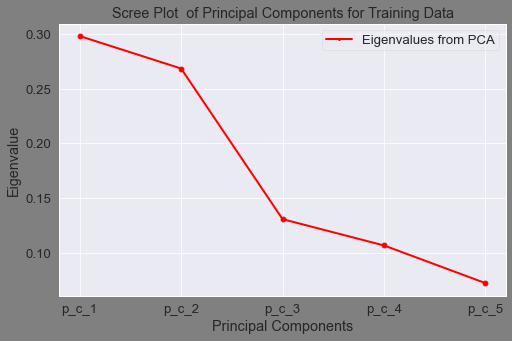

In [55]:
# The scree plot displays the variance explained by each principal component within the analysis


fig = plt.figure(figsize=(8,5))
plt.plot(principalComponents_train_data_Df.columns, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue') 
plt.title('Scree Plot  of Principal Components for Training Data')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [56]:
# In this data set, there are not variables with identical principal components so I will keep all the variables

df_comp = pd.DataFrame(pca.components_,index=list(['component 0', 'component 1', 'component 2',
                                                  'component 3','component 4']))
components = df_comp.sort_values(by ='component 0', axis=1,ascending=False).round(decimals=6)
components
components.transpose()

,component 0,component 1,component 2,component 3,component 4
3,0.615724,-0.030986,-0.352861,0.643037,0.244235
2,0.596513,-0.146381,-0.305458,-0.701261,-0.170447
1,0.367268,0.610106,0.380354,-0.101687,0.234466
5,0.125321,0.051858,0.062137,0.200373,-0.632553
7,0.017413,0.096246,0.121324,0.017544,-0.080106
9,0.000288,-0.061815,-0.128443,-0.020449,0.172725
8,-0.017701,-0.034431,0.007119,0.002905,-0.092619
4,-0.046817,-0.566344,-0.138285,0.044929,0.063169
6,-0.125321,-0.051858,-0.062137,-0.200373,0.632553
0,-0.309760,0.514771,-0.761185,-0.036667,-0.085189


In [57]:
# The dataframe (X_train_final) created below is going to be my final predictors.
# My target variable is: y1 = train[['Survived']]

y1 = train[['Survived']]
X_train_final = norm_train_data
X_train_final.head()



,Age,Fare,SibSp,Parch,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.565736,-0.502445,0.432793,-0.473674,3,0,1,0,0,1
1,0.663861,0.786845,0.432793,-0.473674,1,1,0,1,0,0
2,-0.258337,-0.488854,-0.474545,-0.473674,3,1,0,0,0,1
3,0.433312,0.420730,0.432793,-0.473674,1,1,0,0,0,1
4,0.433312,-0.486337,-0.474545,-0.473674,3,0,1,0,0,1


# Principal Components Analysis - Test Data Set

In [58]:
# creates instance of PCA 

pca = PCA(n_components=5)
principalComponents_test_data = pca.fit_transform(norm_test_data)

In [59]:
# View the shape

print(principalComponents_test_data.shape)


(418, 5)


In [60]:
# Create a dataframe with the variable and view the first few rows of dataframe

principalComponents_test_data_Df = pd.DataFrame(data = principalComponents_test_data
             , columns = ['p_c_1', 'p_c_2','p_c_3','p_c_4','p_c_5'])
principalComponents_test_data_Df.head()


,p_c_1,p_c_2,p_c_3,p_c_4,p_c_5
0,-0.751279,-0.688530,0.044967,-0.538845,-0.076368
1,0.071483,-0.125272,-0.713470,-1.235368,-1.276533
2,0.806657,-1.739885,-0.178056,-1.906492,-0.337190
3,-1.051863,-0.360931,0.084586,-0.251797,0.371990
4,-0.596437,1.280588,0.103279,-0.048973,-0.791237


In [61]:
# View Explained variation per principal components

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.31921624 0.24305577 0.12289194 0.10803101 0.07580126]


In [62]:
# Sum the Explained variation per principal components values

np.sum(np.array([0.31908315, 0.24307273, 0.12289359, 0.10830283, 0.07580581]))


0.8691581099999999

# Screeplot of PCA - Test Data Set


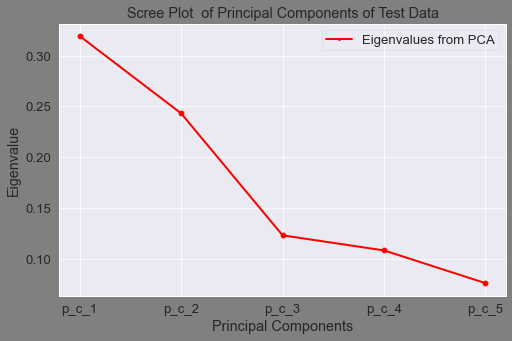

In [63]:
# The scree plot displays the variance explained by each principal component within the analysis

fig = plt.figure(figsize=(8,5))
plt.plot(principalComponents_test_data_Df.columns, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue') 
plt.title('Scree Plot  of Principal Components of Test Data')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [64]:
# In this data set, there are not variables with identical principal components so I will keep all the variables

df_compt = pd.DataFrame(pca.components_,index=list(['component 0', 'component 1', 'component 2',
                                                  'component 3','component 4']))
components = df_compt.sort_values(by ='component 0', axis=1,ascending=False).round(decimals=6)
components
components.transpose()

,component 0,component 1,component 2,component 3,component 4
1,0.642529,0.043416,0.066419,0.466130,0.186577
0,0.489176,-0.387629,-0.073636,-0.733097,-0.194677
3,0.230342,0.625409,0.652231,-0.296232,0.082381
2,0.186431,0.625747,-0.741304,-0.129989,-0.035421
7,0.114309,-0.051584,0.002761,0.145666,-0.008490
5,0.081652,0.074659,0.073814,0.165487,-0.648281
8,-0.046635,-0.023123,0.001069,0.003785,-0.161005
9,-0.067675,0.074706,-0.003830,-0.149452,0.169495
6,-0.081652,-0.074659,-0.073814,-0.165487,0.648281
4,-0.476334,0.212691,0.065645,-0.205669,-0.154887


In [65]:
# The dataframe ((X_test_final) created below is going to be my final predictors.

X_test_final = norm_test_data
X_test_final.head()

,Age,Fare,SibSp,Parch,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.386231,-0.498023,-0.499470,-0.400248,3,0,1,0,1,0
1,1.371370,-0.512890,0.616992,-0.400248,3,1,0,0,0,1
2,2.553537,-0.464705,-0.499470,-0.400248,2,0,1,0,1,0
3,-0.204852,-0.483082,-0.499470,-0.400248,3,0,1,0,0,1
4,-0.598908,-0.418089,0.616992,0.619896,3,1,0,0,0,1


# Create a Training and Test Sets for Modelling- Train Test Split¶
** Split my training data into a training set and a testing set.**

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# Split my training data into a training set and a testing set
X = X_train_final
y = y1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [68]:
# View the shape of the sets

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((891, 10), (891, 1), (623, 10), (623, 1), (268, 10), (268, 1))

# Training the Support Vector Machine Model with Training Data Set


* I will use support vector machine (SVM) in classification mode for the model and use GridSearchCV to tune it.

**Call the SVC() model from sklearn and fit the model to the training data.**

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
# Train a Support Vector Machine Classifier. 

svc_model = SVC()

In [71]:
# Fit the model

svc_model.fit(X_train,y_train)

SVC()

# Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [72]:
# View the predictions from SVC model

predictions = svc_model.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

In [73]:
# Support Vector Machines Model Accuracy
# Conclusion: It shows the accuracy to be ~ 83.15%.

acc_svc = round(svc_model.score(X_train, y_train) * 100, 2)
acc_svc

83.15

In [74]:
# Confusion matrix and statistics
# Conclusion: True Positives 148, False Positives 14, False Negatives 29, and True Negative is 77 

print(confusion_matrix(y_test,predictions))

[[148  14]
 [ 29  77]]


In [75]:
# print classification report 

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       162
           1       0.85      0.73      0.78       106

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



# Gridsearch Practice

** Import GridsearchCV from SciKit Learn.** 

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# Running the gridsearch analysis
# Conclusion: the gridsearch best score is ~83.94%


svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.027,0.029,0.03,0.031],
                  'C': [45,55,76,77,78,85,95,100],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVC = GridSearchCV(SVC(), param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 2)

gsSVC.fit(X_train,y_train)

svm_best = gsSVC.best_estimator_

gsSVC.best_score_



Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   31.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:   48.1s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 1001 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 1280 out of 1280 | elapsed:  1.6min finished


0.8394265232974909

In [78]:
# View the predictions

grid_predictions = gsSVC.predict(X_test)
grid_predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

In [79]:
# Confusion matrix and statistics
# Conclusion: True Positives 155, False Positives 7, False Negatives 40, and True Negative is 66 

print(confusion_matrix(y_test,grid_predictions))


[[155   7]
 [ 40  66]]


In [80]:
# print classification report 

print(classification_report(y_test,grid_predictions)) 

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       162
           1       0.90      0.62      0.74       106

    accuracy                           0.82       268
   macro avg       0.85      0.79      0.80       268
weighted avg       0.84      0.82      0.82       268



# Using the Support Vector Machine Model with Normalized and Standardized Test Data Set

In [81]:
testcsv = X_test_final

In [82]:
svc_preds = svc_model.predict(testcsv)
svc_preds 

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Predicting and creating a submission file¶

In [83]:
submission =  pd.DataFrame({'PassengerId':pid,'Survived':svc_preds })
submission.to_csv('submission.csv',index=False)